<b><h1> Twitter Sentiment Analysis - Public Opinion on Social Media
## 📝 About the Dataset
This dataset contains entity-level sentiment analysis data from Twitter. Each entry includes a tweet, the associated topic, and the sentiment expressed toward that topic. Sentiments are categorized as:
 - Positive
 - Negative
 - Neutral (including irrelevant tweets)

<b><h3>1. Importing Required Libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

sns.set(style='whitegrid')

<b><h3>2. Reading the Dataset

In [5]:
cols = ['ID', 'Topic', 'Sentiment', 'Text']
train = pd.read_csv(r'twitter_training.csv', names=cols)
train.head()

,ID,Topic,Sentiment,Text
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


<b><h3>3. Dataset Information and Initial Exploration

In [7]:
train.shape

(74682, 4)

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74682 entries, 0 to 74681
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         74682 non-null  int64 
 1   Topic      74682 non-null  object
 2   Sentiment  74682 non-null  object
 3   Text       73996 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


In [9]:
# Descriptive statistics for object columns
train.describe(include='object')

,Topic,Sentiment,Text
count,74682,74682,73996
unique,32,4,69491
top,TomClancysRainbowSix,Negative,"At the same time, despite the fact that there ..."
freq,2400,22542,172


In [10]:
# Unique sentiment labels
train['Sentiment'].unique()

array(['Positive', 'Neutral', 'Negative', 'Irrelevant'], dtype=object)

<b><h3>4. Handling Missing and Duplicate Data

#### Check for missing values

In [13]:
train.isnull().sum()

ID             0
Topic          0
Sentiment      0
Text         686
dtype: int64

#### Drop null values

In [15]:
train.dropna(inplace=True)

#### Confirm removal

In [17]:
train.isnull().sum()

ID           0
Topic        0
Sentiment    0
Text         0
dtype: int64

#### Check for duplicate rows

In [19]:
train.duplicated().sum()

2340

#### Drop duplicates

In [21]:
train.drop_duplicates(inplace=True)

#### Confirm Removal

In [23]:
train.duplicated().sum()

0

<b><h3>5. Visualizing Topic Frequency

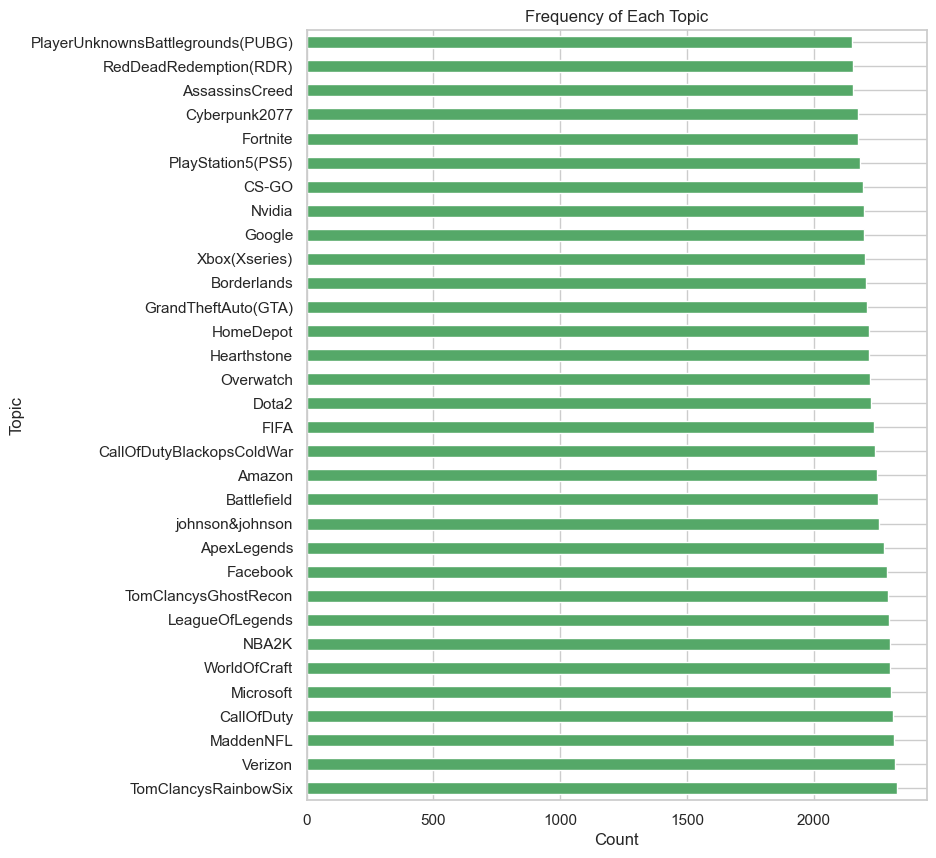

In [25]:
plt.figure(figsize=(8, 10))
train['Topic'].value_counts().plot(kind='barh', color='g')
plt.xlabel("Count")
plt.title("Frequency of Each Topic")
plt.show()

<b><h3>6. Sentiment Analysis

<b><h4>A. Sentiment Distribution - Overall

#### Sentiment Count Distribution Plot

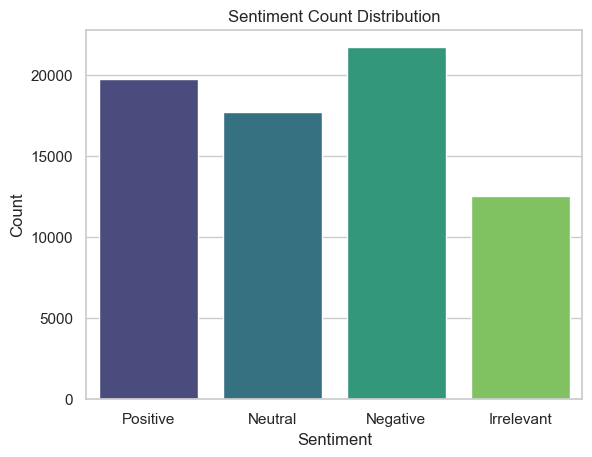

In [29]:
sns.countplot(x='Sentiment', hue='Sentiment', data=train, palette='viridis', legend=False)
plt.title('Sentiment Count Distribution')
plt.ylabel('Count')
plt.show()

#### Sentiment Distribution Pie Chart

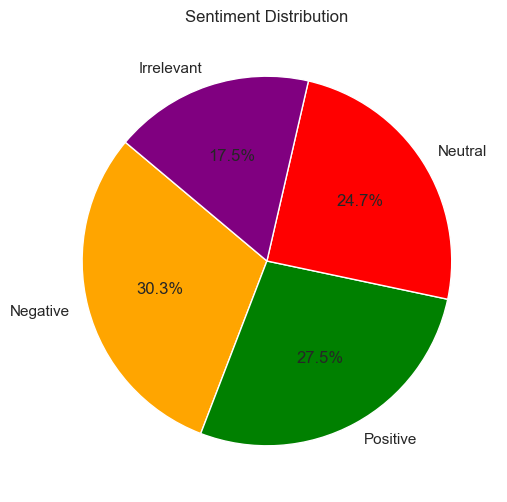

In [31]:
sentiment_counts = train['Sentiment'].value_counts()

plt.figure(figsize=(6,6))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140, colors=['orange', 'green', 'red', 'purple'])
plt.title('Sentiment Distribution')
plt.show()

<b><h4>B. Sentiment Distribution Topic-Wise

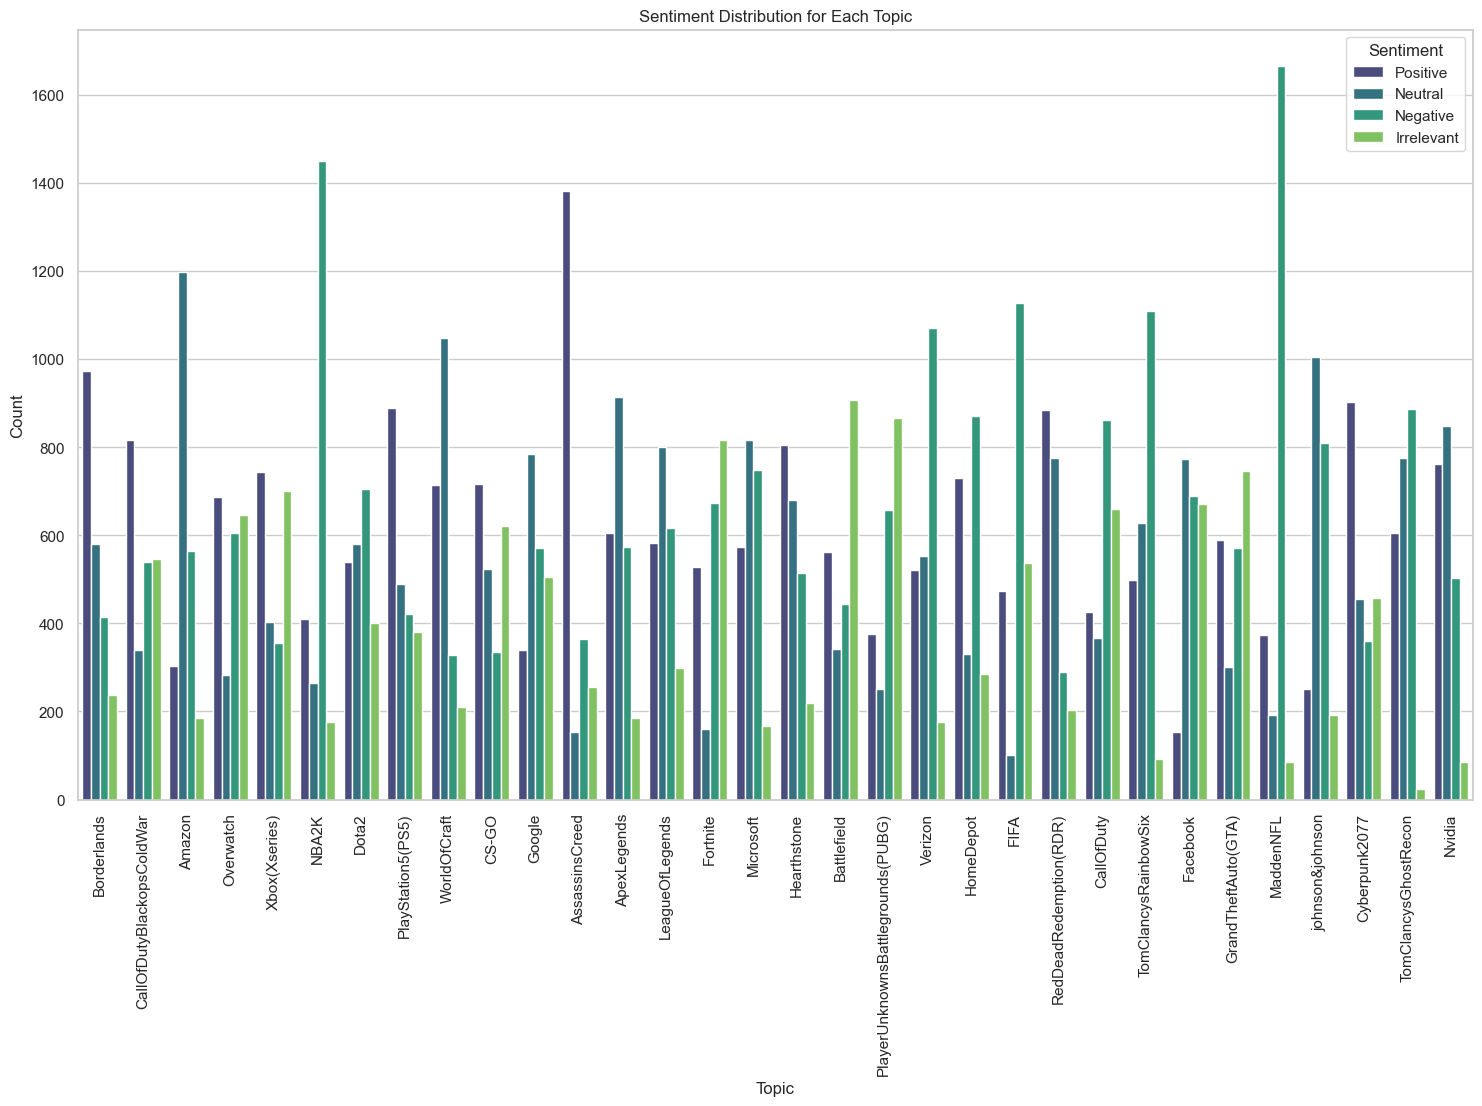

In [33]:
plt.figure(figsize=(18,10))
sns.countplot(x='Topic', data=train, hue='Sentiment', palette='viridis')
plt.xticks(rotation=90)
plt.title('Sentiment Distribution for Each Topic')
plt.ylabel('Count')
plt.show()

<b><h4>C. Group by Topic and Sentiment (Top 5 Topics)

In [35]:
topic_wise_sentiment = train.groupby(['Topic', 'Sentiment']).size().reset_index(name='Count')
topic_counts = train['Topic'].value_counts().nlargest(5).index
top_topics_sentiment = topic_wise_sentiment[topic_wise_sentiment['Topic'].isin(topic_counts)]

#### Top 5 Topics with Negative Sentiments

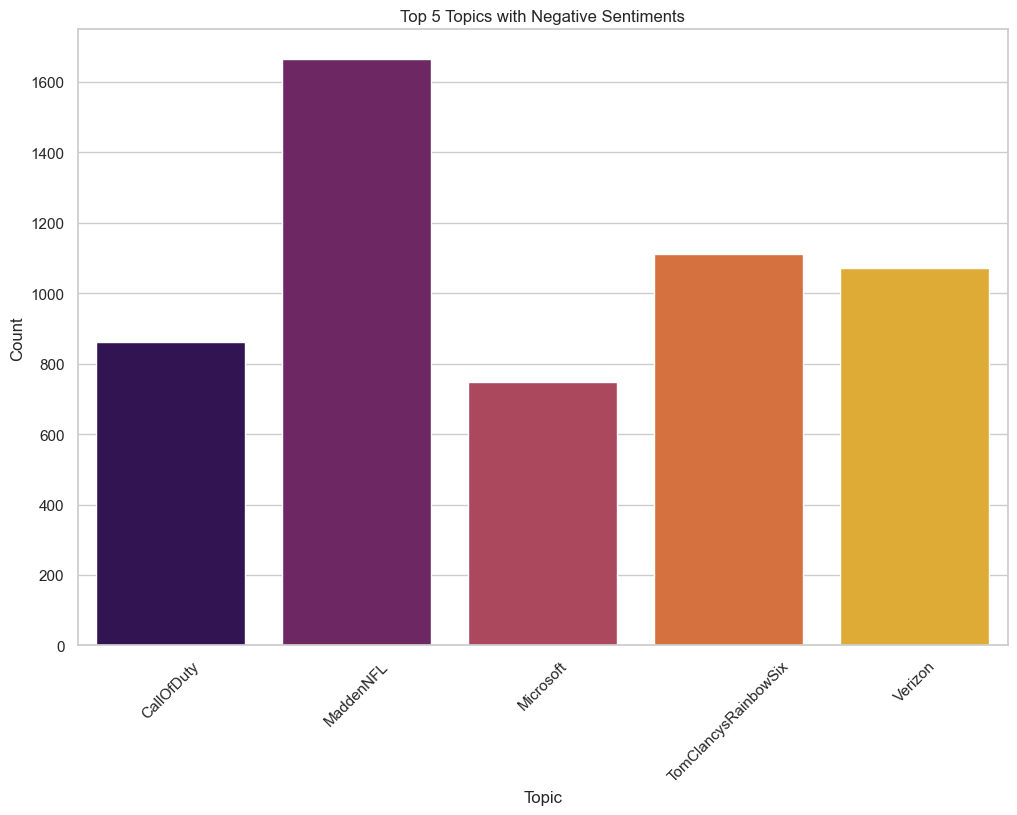

In [37]:
plt.figure(figsize=(12, 8))
sns.barplot(data=top_topics_sentiment[top_topics_sentiment['Sentiment'] == 'Negative'], x='Topic', y='Count', hue='Topic', legend=False, 
            palette='inferno')
plt.title('Top 5 Topics with Negative Sentiments')
plt.xlabel('Topic')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

#### Top 5 Topics with Positive Sentiments

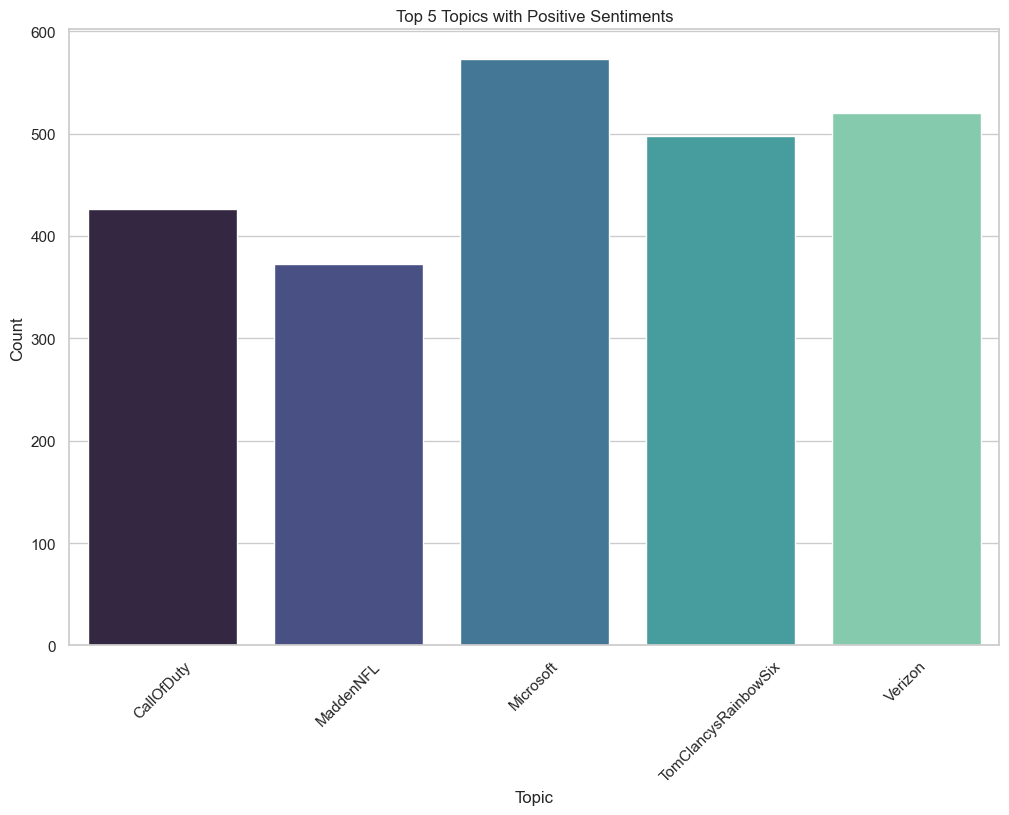

In [39]:
plt.figure(figsize=(12, 8))
sns.barplot(data=top_topics_sentiment[top_topics_sentiment['Sentiment'] == 'Positive'], x='Topic', y='Count', hue='Topic', legend=False, 
            palette='mako')
plt.title('Top 5 Topics with Positive Sentiments')
plt.xlabel('Topic')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

#### Top 5 Topics with Neutral Sentiments

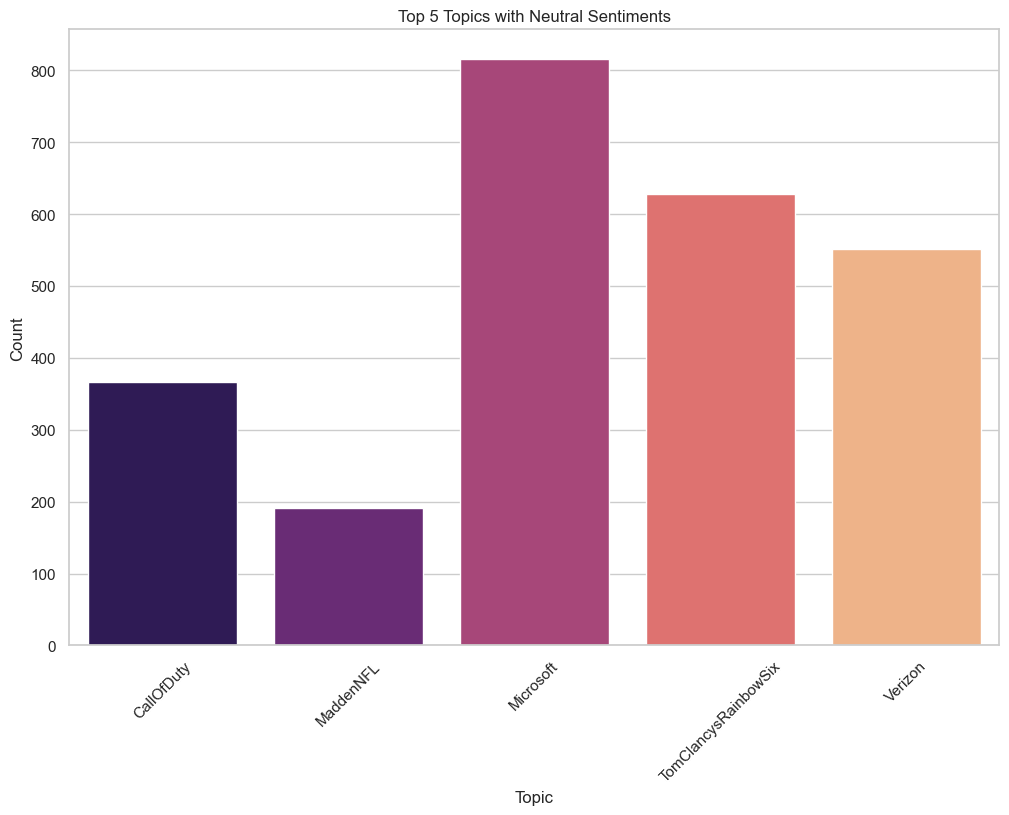

In [41]:
plt.figure(figsize=(12, 8))
sns.barplot(data=top_topics_sentiment[top_topics_sentiment['Sentiment'] == 'Neutral'], x='Topic', y='Count', hue='Topic', legend=False, palette='magma')
plt.title('Top 5 Topics with Neutral Sentiments')
plt.xlabel('Topic')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

#### Top 5 Topics with Irrelevant Sentiments

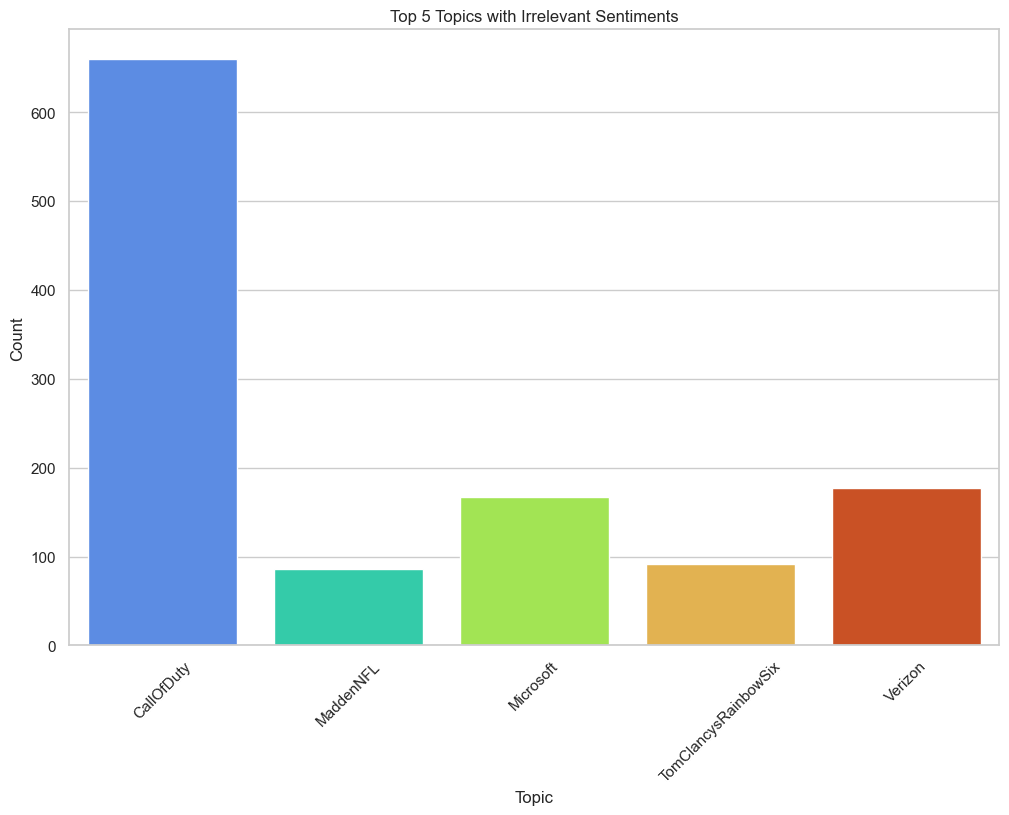

In [43]:
plt.figure(figsize=(12, 8))
sns.barplot(data=top_topics_sentiment[top_topics_sentiment['Sentiment'] == 'Irrelevant'], x='Topic', y='Count', hue='Topic', legend=False, palette='turbo')
plt.title('Top 5 Topics with Irrelevant Sentiments')
plt.xlabel('Topic')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

<b><h4>D. Sentiment Analysis towards specific brands

#### Sentiment Analysis for Google

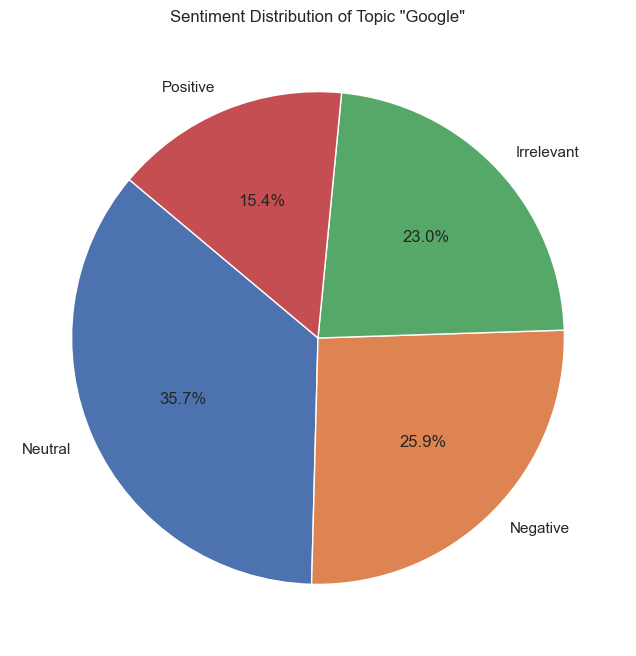

In [46]:
google_data = train[train['Topic'] == 'Google']
sentiment_counts = google_data['Sentiment'].value_counts()

plt.figure(figsize=(8,8))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Sentiment Distribution of Topic "Google"')
plt.show()

#### Sentiment Analysis for Microsoft

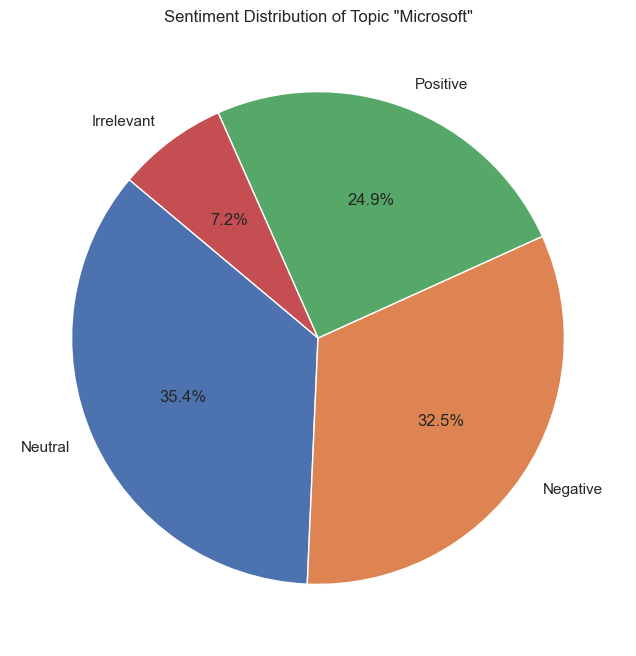

In [48]:
microsoft_data = train[train['Topic'] == 'Microsoft']
sentiment_counts = microsoft_data['Sentiment'].value_counts()

plt.figure(figsize=(8,8))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Sentiment Distribution of Topic "Microsoft"')
plt.show()

<b><h4>E. Message Length Analysis

In [50]:
train['msg_len'] = train['Text'].apply(len)
train[['Text', 'msg_len']].head()

,Text,msg_len
0,im getting on borderlands and i will murder yo...,53
1,I am coming to the borders and I will kill you...,51
2,im getting on borderlands and i will kill you ...,50
3,im coming on borderlands and i will murder you...,51
4,im getting on borderlands 2 and i will murder ...,57


#### Message Length Distribution

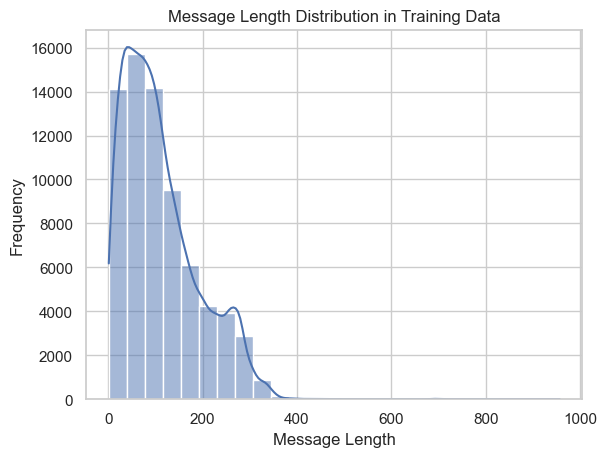

In [52]:
sns.histplot(train['msg_len'], bins=25, kde=True)
plt.title('Message Length Distribution in Training Data')
plt.ylabel('Frequency')
plt.xlabel('Message Length')
plt.show()

#### Message Length by Sentiment

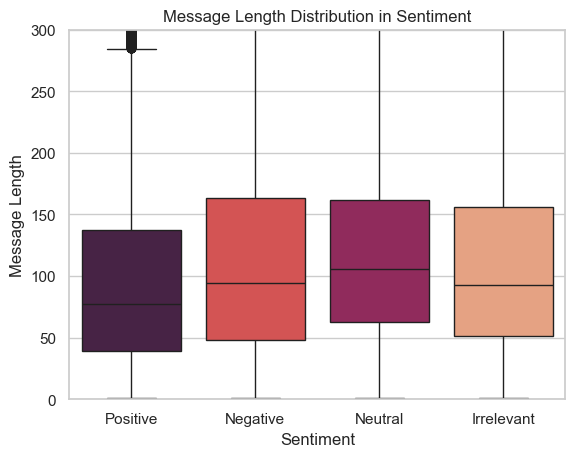

In [54]:
sns.boxplot(data=train, x='Sentiment', y='msg_len', palette='rocket', legend=False, hue='Sentiment', order=['Positive', 'Negative', 'Neutral', 'Irrelevant'])
plt.title('Message Length Distribution in Sentiment')
plt.ylabel('Message Length')
plt.xlabel('Sentiment')
plt.ylim(0, 300)
plt.show()

<b><h4>F. Heatmap of Topics vs Sentiments

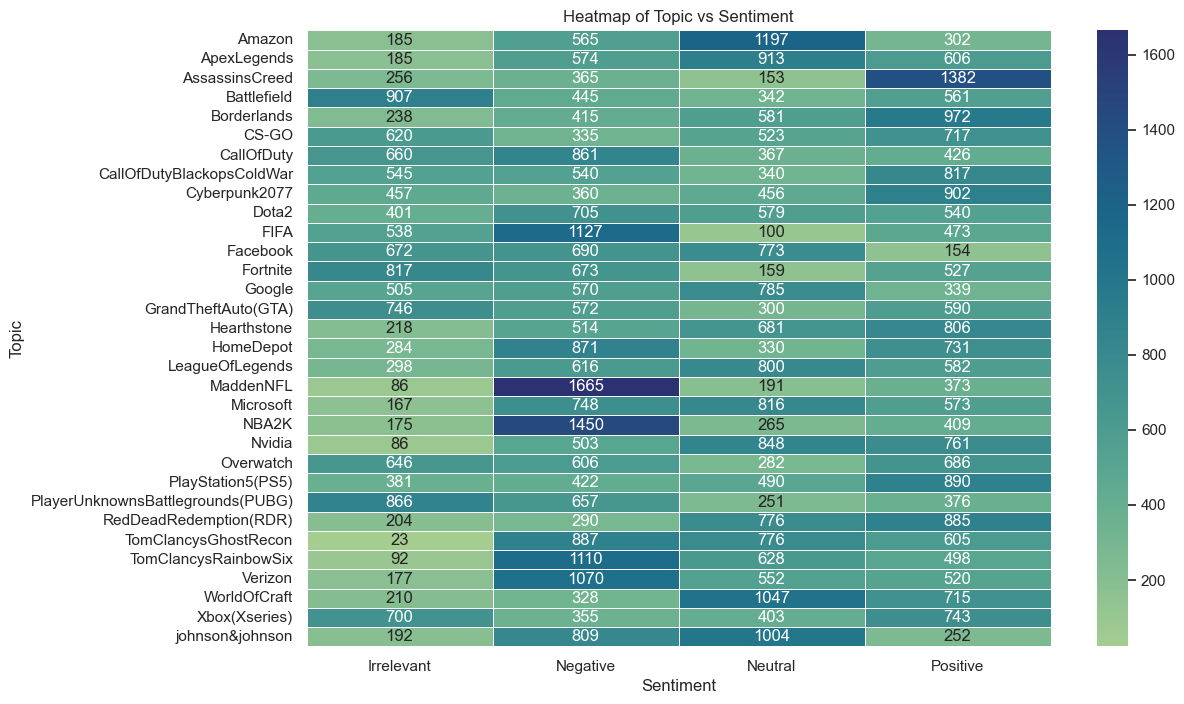

In [56]:
crosstab = pd.crosstab(index=train['Topic'], columns=train['Sentiment'])

plt.figure(figsize=(12, 8))
sns.heatmap(crosstab, cmap='crest', annot=True, fmt='d', linewidths=.5)
plt.title('Heatmap of Topic vs Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Topic')
plt.show()

<b><h4>G. WordClouds

#### WordCloud of Topics

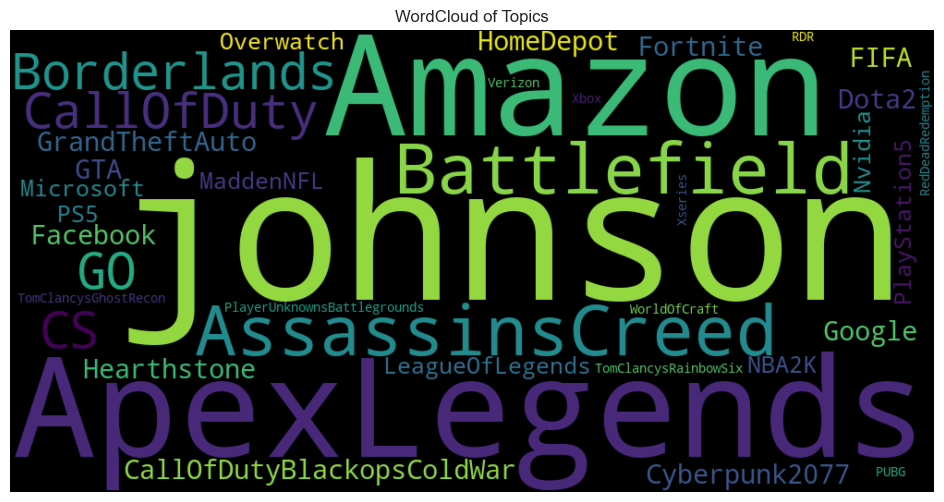

In [59]:
topic_list = ' '.join(crosstab.index)
wc = WordCloud(width=1000, height=500).generate(topic_list)
plt.figure(figsize=(12, 6))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud of Topics')
plt.show()

#### WordCloud of Tweet Corpus

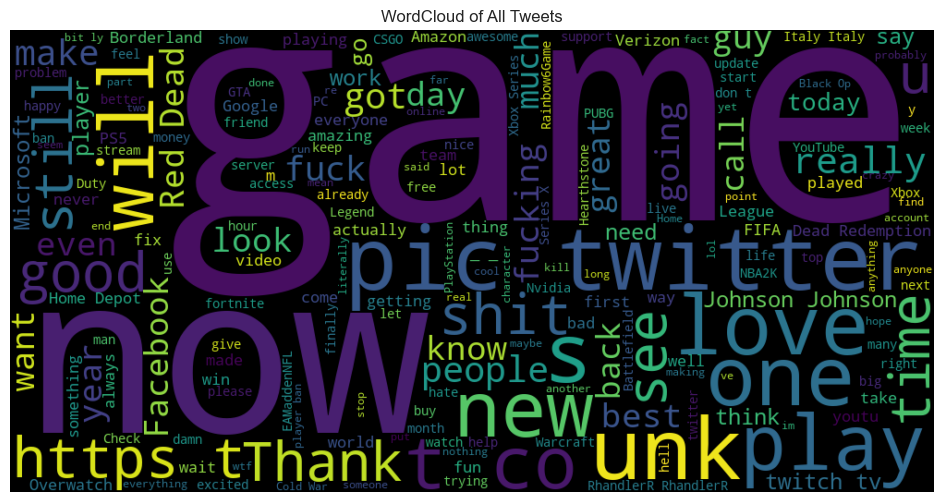

In [61]:
corpus = ' '.join(train['Text'])
wc2 = WordCloud(width=1000, height=500).generate(corpus)
plt.figure(figsize=(12, 6))
plt.imshow(wc2, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud of All Tweets')
plt.show()

<b><h3>Conclusion

1. **Most Frequent Topic**: "TomClancyRainbowSix" is the most frequently mentioned topic.
2. **Sentiment Distribution**:
   - Negative: 30.3%
   - Positive: 27.5%
   - Neutral: 24.7%
   - Irrelevant: 17.5%
3. **Topic-wise Sentiment**:
   - "Google" and "Microsoft" mainly show neutral sentiment.
4. **Message Length**:
   - Most tweets are under 400 characters, reflecting the short, concise nature of tweets.
5. **Topic vs Sentiment**:
   - The heatmap and bar plots show how sentiment varies widely amng topics.
